In [2]:
#import sklearn
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)
import gc
import warnings
warnings.filterwarnings('ignore')

In [3]:
trad = pd.read_parquet('bureau_features.parquet.gzip')

In [4]:
oct = pd.read_csv('oct_data.csv')
nov = pd.read_csv('nov_data.csv')
dec = pd.read_csv('dec_data.csv')

In [5]:
raw = dec.append(nov).append(oct)

In [6]:
raw.drop_duplicates(subset = ['r.mobileno'], keep = 'first', inplace = True)

In [7]:
raw

,r.mobileno,bre_success,confirmed_flag,month
0,8800353758,0,0,December
1,7498722097,1,0,December
2,9622444714,1,0,December
3,7865955287,0,0,December
4,8448771301,1,0,December
...,...,...,...,...
56734,8148888263,0,0,October
56735,9660956060,0,0,October
56736,6363186009,0,0,October
56737,7600779090,0,0,October


In [8]:
final = pd.merge(trad,raw,left_on = 'customer_number', right_on = 'r.mobileno', how = 'left')

In [9]:
trad.dtypes

customer_number                    int64
no_of_trades                       int64
live_trad                          int64
total_pl                           int64
live_pl                            int64
                                  ...   
mean_hl_remaining_balance_per    float64
mean_credit_utilization          float64
guarantor                          int64
joint                              int64
count_of_active_stpl               int64
Length: 113, dtype: object

In [10]:
final

,customer_number,no_of_trades,live_trad,total_pl,live_pl,total_bl,live_bl,total_cc,live_cc,total_cl,live_cl,total_hl,live_hl,total_al,live_al,new_pl_3m,new_pl_6m,new_bl_3m,new_bl_6m,new_cc_3m,new_cc_6m,sum_pl_limit,active_sum_pl_limit,sum_pl_limit_last_6m,sum_bl_limit,active_sum_bl_limit,sum_bl_limit_last_6m,sum_cc_limit,active_sum_cc_limit,sum_cc_limit_last_6m,pl_remaining_balance,bl_remaining_balance,al_remaining_balance,hl_remaining_balance,No_of_ALHLLAPPLCCBLSBL,TotalOverDueAmount,1_months_dpd_instances,2_months_dpd_instances,3_months_dpd_instances,6_months_dpd_instances,9_months_dpd_instances,12_months_dpd_instances,score,Age,Income,max_EMI,derog,Vintage,pl_vintage,live_pl_vintage,pl_last_active,pl_last_closed,bl_vintage,live_bl_vintage,cc_vintage,live_cc_vintage,cl_vintage,live_cl_vintage,hl_vintage,live_hl_vintage,al_vintage,live_al_vintage,active_max_pl_limit,max_pl_limit,max_pl_limit_last_6m,active_max_bl_limit,max_bl_limit,max_bl_limit_last_6m,active_max_cc_limit,max_cc_limit,max_cc_limit_last_6m,max_pl_remaining_balance_per,max_bl_remaining_balance_per,max_al_remaining_balance_per,max_hl_remaining_balance_per,max_credit_utilization,RBL_ultrahni,final_income,dbr,1_months_max_dpd,2_months_max_dpd,3_months_max_dpd,6_months_max_dpd,9_months_max_dpd,12_months_max_dpd,weighted_dpd_6m,weighted_dpd_12m,pl_weighted_dpd_6m,pl_weighted_dpd_12m,bl_weighted_dpd_6m,bl_weighted_dpd_12m,cl_weighted_dpd_6m,cl_weighted_dpd_12m,cc_weighted_dpd_6m,cc_weighted_dpd_12m,max_dpd_ever,30_plus_ever_count,cc_last_active,cc_last_closed,cl_last_active,cl_last_closed,hl_last_active,hl_last_closed,al_last_active,al_last_closed,mean_pl_remaining_balance_per,mean_bl_remaining_balance_per,mean_al_remaining_balance_per,mean_hl_remaining_balance_per,mean_credit_utilization,guarantor,joint,count_of_active_stpl,r.mobileno,bre_success,confirmed_flag,month
0,6000015388,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,15658.0,1,2,3,6,9,10,656.0,24.0,0.000000,1975.0,0,39.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,NaN,0,4789.410418,0.000000,26,27,27,27,27,27,92.83,162.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,0,1,0,6000015388,0,0,October
1,6000016560,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80000.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,0,1,702.0,24.0,16483.750000,11686.0,0,52.0,13.0,13.0,392.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80000.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,NaN,0,25480.610236,37.039929,0,0,0,0,0,210,0.00,17.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,210,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,0,0,0,6000016560,0,0,October
2,6000029241,10,3,2,0,1,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,40000.0,0.0,0.0,175000.0,0.0,0.0,200881.0,100881.0,0.0,0.0,0.0,0.0,0.0,5,-3.0,0,0,0,1,1,1,719.0,38.0,33627.000000,12374.0,1,152.0,9.0,0.0,NaN,49.0,115.0,0.0,13.0,13.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,25000.0,0.0,0.0,175000.0,0.0,100881.0,100881.0,0.0,0.000000,0.000000,0.000000,0.0,1.00000,0,36739.371135,9.779699,0,0,0,3,3,3,1.50,2.25,0.0,0.0,0.0,0.0,0.0,0.0,1.5,2.25,900,27,372.0,333.0,116.0,64.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,1.00000,0,0,0,6000029241,1,0,October
3,6000048081,2,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,70000.0,70000.0,0.0,0.0,0.0,0.0,0.0,12393.0,0.0,0.0,1,0.0,0,0,0,0,0,0,723.0,26.0,0.000000,2614.0,0,52.0,0.0,0.0,NaN,NaN,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70000.0,70000.0,0.0,0.0,0.0,0.0,0.000000,0.177043,0.000000,0.0,NaN,0,5476.907379,0.000000,0,0,0,0,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,116,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.088521,0.000000,0.0,NaN,0,0,0,6000048081,0,0,October
4,6000059136,4,3,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,736.0,44.0,22613.500000,41

In [11]:
final['bre_success'].value_counts()

0    45956
1    28613
Name: bre_success, dtype: int64

In [12]:
final.shape

(74569, 117)

In [13]:
# enq = pd.read_parquet('enq_features',    columns = ['customer_number',
#                                                     'PL_Enq_Amount_2M_sum',
#                                                     'PL_Enq_Amount_1M_sum',
#                                                     'PL_Enq_Amount_3M_sum',
#                                                     'PL_Enq_Amount_6M_sum',
#                                                     'BL_Enq_1M'])
                                                    

In [14]:
# revisits = pd.read_parquet('revisits_may-aug_3features.parquet.gzip')

In [15]:
# target = pd.read_parquet('target_file.parquet.gzip')

In [16]:
# final = final.drop(['customer_number','r.mobileno','confirmed_flag','month'], axis = 1) 

In [17]:
# revisits['mobilePhone'] = pd.to_numeric(revisits['mobilePhone'], errors = 'coerce')
# revisits['last_30_days_REVISIT'] = pd.to_numeric(revisits['last_30_days_REVISIT'], errors = 'coerce')
# revisits['30_60_days_REVISIT'] = pd.to_numeric(revisits['30_60_days_REVISIT'], errors = 'coerce')
# revisits['60_90_days_REVISIT'] = pd.to_numeric(revisits['60_90_days_REVISIT'], errors = 'coerce')

In [18]:
# merge = pd.merge(trad,enq, on = 'customer_number', how = 'left')

In [19]:
# stage2 = pd.merge(merge,revisits, left_on = 'customer_number', right_on ='mobilePhone', how = 'left')

In [20]:
# final = pd.merge(stage2,target, left_on = 'customer_number', right_on ='phone', how = 'inner')

In [21]:
# check1 = final[final['paid'] == 1]['phone']

In [22]:
# final

In [23]:
import pandas as pd 
import numpy as np 
# from sklearn.model_selection import train_test_split 
# from catboost import CatBoostClassifier 
import warnings 
warnings.filterwarnings("ignore")


In [24]:
input1 = sal_features.drop(['customer_number','r.mobileno','confirmed_flag','month'], axis = 1) 

NameError: name 'sal_features' is not defined

In [ ]:
input1

In [ ]:
X = input1.iloc[:, :-1] 
y = input1.iloc[:, -1] 
print("Shape of X is %s and shape \ of y is %s" % (X.shape, y.shape)) 


In [ ]:
total_classes = y.nunique() 
print("Number of unique cases in dataset are: ",total_classes) 


In [ ]:
distribution = y.value_counts(normalize = True) 
print(distribution) 


In [ ]:
# 3793/183091

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y) 


In [ ]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

In [ ]:
from catboost import CatBoostClassifier, Pool

# Define the model
model = CatBoostClassifier(iterations=500,
                           depth=8,
                           scale_pos_weight = 23,
                           learning_rate=0.06,
                           l2_leaf_reg = 3,
                           loss_function='Logloss',
                           eval_metric='F1', # Changed to F1 score
                           random_seed=42,
                           od_type='Iter',
                           od_wait=500, # most recent 40 iterations
                           use_best_model=True)

# Define the pool
train_pool = Pool(X_train, Y_train)
validate_pool = Pool(X_val, Y_val)

# Fit the model
model.fit(train_pool, eval_set=validate_pool)


In [25]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Define the model
model = CatBoostClassifier(loss_function='Logloss',
                           random_seed=42,
                           )

# Define the parameters for the grid search
params = {'depth': [4,5,6],
          'learning_rate' : [0.04,0.06,0.08],
          'iterations': [ 100,350, 550],
          'eval_metric': ['F1'], # Changed to F1 score
          'scale_pos_weight': [1,3,5],
          'l2_leaf_reg' : [5,10,15,25]
         }

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='f1', verbose = 10, n_jobs=4)
grid.fit(X_train, Y_train)

# Print the best parameters
print("Best Parameters: ", grid.best_params_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
0:	learn: 0.8932372	total: 69.6ms	remaining: 38.2s
1:	learn: 0.8932372	total: 84.9ms	remaining: 23.3s
2:	learn: 0.8932954	total: 102ms	remaining: 18.6s
3:	learn: 0.8932151	total: 117ms	remaining: 15.9s
4:	learn: 0.8932496	total: 135ms	remaining: 14.7s
5:	learn: 0.8932197	total: 151ms	remaining: 13.7s
6:	learn: 0.8933945	total: 167ms	remaining: 13s
7:	learn: 0.8934709	total: 182ms	remaining: 12.4s
8:	learn: 0.8935530	total: 198ms	remaining: 11.9s
9:	learn: 0.8935557	total: 215ms	remaining: 11.6s
10:	learn: 0.8935989	total: 235ms	remaining: 11.5s
11:	learn: 0.8938288	total: 252ms	remaining: 11.3s
12:	learn: 0.8938762	total: 266ms	remaining: 11s
13:	learn: 0.8937759	total: 283ms	remaining: 10.8s
14:	learn: 0.8937690	total: 297ms	remaining: 10.6s
15:	learn: 0.8938916	total: 310ms	remaining: 10.3s
16:	learn: 0.8937913	total: 323ms	remaining: 10.1s
17:	learn: 0.8938289	total: 338ms	remaining: 9.98s
18:	learn: 0.8938164	total: 353

168:	learn: 0.8996106	total: 2.53s	remaining: 5.71s
169:	learn: 0.8996205	total: 2.54s	remaining: 5.69s
170:	learn: 0.8996304	total: 2.56s	remaining: 5.67s
171:	learn: 0.8996964	total: 2.57s	remaining: 5.65s
172:	learn: 0.8996964	total: 2.58s	remaining: 5.63s
173:	learn: 0.8996964	total: 2.6s	remaining: 5.61s
174:	learn: 0.8996964	total: 2.61s	remaining: 5.59s
175:	learn: 0.8997162	total: 2.62s	remaining: 5.57s
176:	learn: 0.8997162	total: 2.63s	remaining: 5.55s
177:	learn: 0.8997459	total: 2.65s	remaining: 5.53s
178:	learn: 0.8997558	total: 2.66s	remaining: 5.51s
179:	learn: 0.8997558	total: 2.67s	remaining: 5.49s
180:	learn: 0.8998284	total: 2.68s	remaining: 5.47s
181:	learn: 0.8998482	total: 2.7s	remaining: 5.45s
182:	learn: 0.8998581	total: 2.71s	remaining: 5.43s
183:	learn: 0.8997591	total: 2.72s	remaining: 5.42s
184:	learn: 0.8998251	total: 2.74s	remaining: 5.41s
185:	learn: 0.8999439	total: 2.75s	remaining: 5.39s
186:	learn: 0.8999439	total: 2.77s	remaining: 5.38s
187:	learn: 0.

332:	learn: 0.9043877	total: 5.46s	remaining: 3.56s
333:	learn: 0.9043777	total: 5.48s	remaining: 3.54s
334:	learn: 0.9043814	total: 5.5s	remaining: 3.53s
335:	learn: 0.9043913	total: 5.51s	remaining: 3.51s
336:	learn: 0.9044375	total: 5.53s	remaining: 3.5s
337:	learn: 0.9044575	total: 5.55s	remaining: 3.48s
338:	learn: 0.9043950	total: 5.57s	remaining: 3.47s
339:	learn: 0.9043950	total: 5.58s	remaining: 3.45s
340:	learn: 0.9043850	total: 5.6s	remaining: 3.43s
341:	learn: 0.9044149	total: 5.62s	remaining: 3.42s
342:	learn: 0.9044349	total: 5.63s	remaining: 3.4s
343:	learn: 0.9045309	total: 5.65s	remaining: 3.38s
344:	learn: 0.9045472	total: 5.67s	remaining: 3.37s
345:	learn: 0.9045472	total: 5.69s	remaining: 3.35s
346:	learn: 0.9045672	total: 5.71s	remaining: 3.34s
347:	learn: 0.9045672	total: 5.73s	remaining: 3.32s
348:	learn: 0.9046170	total: 5.75s	remaining: 3.31s
349:	learn: 0.9046070	total: 5.76s	remaining: 3.29s
350:	learn: 0.9046569	total: 5.78s	remaining: 3.28s
351:	learn: 0.90

502:	learn: 0.9076801	total: 8.63s	remaining: 807ms
503:	learn: 0.9077403	total: 8.65s	remaining: 790ms
504:	learn: 0.9077403	total: 8.67s	remaining: 773ms
505:	learn: 0.9077865	total: 8.69s	remaining: 755ms
506:	learn: 0.9077403	total: 8.7s	remaining: 738ms
507:	learn: 0.9077403	total: 8.72s	remaining: 721ms
508:	learn: 0.9079493	total: 8.74s	remaining: 704ms
509:	learn: 0.9079231	total: 8.76s	remaining: 687ms
510:	learn: 0.9079995	total: 8.78s	remaining: 670ms
511:	learn: 0.9080296	total: 8.8s	remaining: 653ms
512:	learn: 0.9080597	total: 8.83s	remaining: 637ms
513:	learn: 0.9081160	total: 8.86s	remaining: 620ms
514:	learn: 0.9081160	total: 8.88s	remaining: 604ms
515:	learn: 0.9081260	total: 8.9s	remaining: 587ms
516:	learn: 0.9081723	total: 8.93s	remaining: 570ms
517:	learn: 0.9081723	total: 8.94s	remaining: 552ms
518:	learn: 0.9081823	total: 8.96s	remaining: 535ms
519:	learn: 0.9082125	total: 8.98s	remaining: 518ms
520:	learn: 0.9082325	total: 8.99s	remaining: 501ms
521:	learn: 0.9

In [43]:
# Import the necessary packages
import optuna
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Define the objective function
def objective(trial):
    # Sample the hyperparameters
    depth = trial.suggest_int('depth', 2, 7)
    iterations = trial.suggest_int('iterations', 100, 1000)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 2 , 100, log=True)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.9, log=True)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 50)
    eval_metric = trial.suggest_categorical("eval_metric", ["F1"])
    random_strength = trial.suggest_float("random_strength", 5, 50.0)
    border_count = trial.suggest_int("border_count", 10, 200)
    boosting_type = trial.suggest_categorical("boosting_type", ["Plain"])
    bootstrap_type = trial.suggest_categorical("bootstrap_type", ["Bernoulli"])   
    subsample = trial.suggest_float("subsample", 0.05, 1.0)

    # Initialize the CatBoostClassifier object with all the sampled parameters
    model = CatBoostClassifier(
        depth=depth, 
        iterations=iterations, 
        l2_leaf_reg=l2_leaf_reg, 
        learning_rate=learning_rate, 
        scale_pos_weight=scale_pos_weight, 
        eval_metric=eval_metric,
        random_strength=random_strength,
        border_count=border_count,
        boosting_type=boosting_type,
        bootstrap_type=bootstrap_type,
        subsample=subsample,
        verbose=False
    )

    # Fit the model on the training set
    model.fit(X_train, Y_train)

    # Predict the labels on the validation set
    Y_pred = model.predict(X_val)

    # Calculate and return the F1 score
    f1 = f1_score(Y_val, Y_pred)
    return f1

# Create a study object
study = optuna.create_study(sampler=TPESampler(), direction='maximize')

# Optimize the study
study.optimize(objective, n_trials=100,n_jobs=4)

# Print the best parameters and the best value
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)


[I 2023-12-18 16:26:09,764] A new study created in memory with name: no-name-b9dc5a3a-6846-44d8-b866-a88dad6b9f20
[I 2023-12-18 16:26:15,563] Trial 3 finished with value: 0.5606910589286601 and parameters: {'depth': 3, 'iterations': 153, 'l2_leaf_reg': 6.809498403647739, 'learning_rate': 0.07474921793567268, 'scale_pos_weight': 30, 'eval_metric': 'F1', 'random_strength': 9.96000626592981, 'border_count': 188, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8876040957370706}. Best is trial 3 with value: 0.5606910589286601.
[I 2023-12-18 16:26:18,352] Trial 1 finished with value: 0.5635210071439277 and parameters: {'depth': 3, 'iterations': 307, 'l2_leaf_reg': 43.49670532888917, 'learning_rate': 0.06034381566918568, 'scale_pos_weight': 27, 'eval_metric': 'F1', 'random_strength': 20.173045538247685, 'border_count': 183, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.05909314062241188}. Best is trial 1 with value: 0.5635210071439277.
[I 2023

[I 2023-12-18 16:28:50,353] Trial 17 finished with value: 0.5894999406105238 and parameters: {'depth': 6, 'iterations': 629, 'l2_leaf_reg': 14.500200462365287, 'learning_rate': 0.8743376085548663, 'scale_pos_weight': 8, 'eval_metric': 'F1', 'random_strength': 36.53930399658437, 'border_count': 147, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6131764296221709}. Best is trial 18 with value: 0.5943121183783487.
[I 2023-12-18 16:28:56,525] Trial 19 finished with value: 0.5944245100745239 and parameters: {'depth': 6, 'iterations': 550, 'l2_leaf_reg': 13.01283020199942, 'learning_rate': 0.8607863801415226, 'scale_pos_weight': 13, 'eval_metric': 'F1', 'random_strength': 35.83534646243242, 'border_count': 197, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.33880373548978426}. Best is trial 19 with value: 0.5944245100745239.
[I 2023-12-18 16:29:05,599] Trial 20 finished with value: 0.5918422328789267 and parameters: {'depth': 5, 'iterations':

[I 2023-12-18 16:31:54,149] Trial 37 finished with value: 0.5927587311759052 and parameters: {'depth': 4, 'iterations': 832, 'l2_leaf_reg': 45.58443354567421, 'learning_rate': 0.31083563484987936, 'scale_pos_weight': 11, 'eval_metric': 'F1', 'random_strength': 17.426102768236305, 'border_count': 106, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.49697110487936064}. Best is trial 32 with value: 0.59589001447178.
[I 2023-12-18 16:32:14,392] Trial 38 finished with value: 0.5945536246007255 and parameters: {'depth': 4, 'iterations': 871, 'l2_leaf_reg': 37.7730870381861, 'learning_rate': 0.4800993577938371, 'scale_pos_weight': 11, 'eval_metric': 'F1', 'random_strength': 24.223206275419948, 'border_count': 99, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6772936704483963}. Best is trial 32 with value: 0.59589001447178.
[I 2023-12-18 16:32:28,104] Trial 39 finished with value: 0.5963528268450238 and parameters: {'depth': 4, 'iterations': 84

[I 2023-12-18 16:35:29,961] Trial 56 finished with value: 0.39027188252839284 and parameters: {'depth': 2, 'iterations': 969, 'l2_leaf_reg': 81.29128081932751, 'learning_rate': 0.08758865741066031, 'scale_pos_weight': 1, 'eval_metric': 'F1', 'random_strength': 11.238861704187537, 'border_count': 46, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9799023780184747}. Best is trial 48 with value: 0.6021650120590051.
[I 2023-12-18 16:35:57,670] Trial 57 finished with value: 0.3966923425464431 and parameters: {'depth': 3, 'iterations': 883, 'l2_leaf_reg': 80.78689788739729, 'learning_rate': 0.07435752826670744, 'scale_pos_weight': 1, 'eval_metric': 'F1', 'random_strength': 6.526337045795446, 'border_count': 48, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9968831007756102}. Best is trial 48 with value: 0.6021650120590051.
[I 2023-12-18 16:36:07,638] Trial 58 finished with value: 0.5985974087721383 and parameters: {'depth': 3, 'iterations': 

KeyboardInterrupt: 

In [48]:
# Define the hyperparameters for the CatBoost algorithm 
from catboost import CatBoostClassifier, Pool

# params = {'depth': 6, 'eval_metric': 'F1', 'iterations': 550, 'l2_leaf_reg': 25, 'learning_rate': 0.08, 'scale_pos_weight': 3}

params = {'depth': 3, 'iterations': 911, 'l2_leaf_reg': 57.52536999082635, 'learning_rate': 0.16080607353935636, 'scale_pos_weight': 3, 'eval_metric': 'F1', 'random_strength': 12.812343358390132, 'border_count': 60, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8108896719893812}
# Initialize the CatBoostClassifier object 
# with the defined hyperparameters and fit it on the training set 
model = CatBoostClassifier(**params) 
model.fit(X_train, Y_train)


0:	learn: 0.7941400	total: 61.8ms	remaining: 56.2s
1:	learn: 0.7952532	total: 98.2ms	remaining: 44.6s
2:	learn: 0.8006955	total: 111ms	remaining: 33.7s
3:	learn: 0.8020570	total: 121ms	remaining: 27.5s
4:	learn: 0.8017583	total: 131ms	remaining: 23.8s
5:	learn: 0.8021578	total: 140ms	remaining: 21.1s
6:	learn: 0.8020672	total: 151ms	remaining: 19.5s
7:	learn: 0.8015667	total: 159ms	remaining: 17.9s
8:	learn: 0.8016746	total: 204ms	remaining: 20.4s
9:	learn: 0.8016126	total: 235ms	remaining: 21.1s
10:	learn: 0.8018759	total: 259ms	remaining: 21.2s
11:	learn: 0.8023439	total: 288ms	remaining: 21.5s
12:	learn: 0.8025305	total: 303ms	remaining: 20.9s
13:	learn: 0.8024028	total: 317ms	remaining: 20.3s
14:	learn: 0.8039619	total: 327ms	remaining: 19.5s
15:	learn: 0.8047916	total: 337ms	remaining: 18.9s
16:	learn: 0.8047160	total: 345ms	remaining: 18.2s
17:	learn: 0.8047226	total: 354ms	remaining: 17.6s
18:	learn: 0.8048253	total: 364ms	remaining: 17.1s
19:	learn: 0.8049321	total: 379ms	remai

171:	learn: 0.8126074	total: 2.16s	remaining: 9.28s
172:	learn: 0.8126174	total: 2.17s	remaining: 9.25s
173:	learn: 0.8127421	total: 2.18s	remaining: 9.22s
174:	learn: 0.8126805	total: 2.18s	remaining: 9.19s
175:	learn: 0.8128145	total: 2.19s	remaining: 9.15s
176:	learn: 0.8129406	total: 2.2s	remaining: 9.12s
177:	learn: 0.8129457	total: 2.21s	remaining: 9.09s
178:	learn: 0.8128410	total: 2.21s	remaining: 9.06s
179:	learn: 0.8128410	total: 2.22s	remaining: 9.03s
180:	learn: 0.8129261	total: 2.23s	remaining: 9s
181:	learn: 0.8128672	total: 2.24s	remaining: 8.97s
182:	learn: 0.8128803	total: 2.25s	remaining: 8.94s
183:	learn: 0.8128784	total: 2.26s	remaining: 8.91s
184:	learn: 0.8129423	total: 2.26s	remaining: 8.88s
185:	learn: 0.8128815	total: 2.27s	remaining: 8.85s
186:	learn: 0.8128858	total: 2.28s	remaining: 8.82s
187:	learn: 0.8130017	total: 2.29s	remaining: 8.8s
188:	learn: 0.8129917	total: 2.29s	remaining: 8.77s
189:	learn: 0.8129953	total: 2.3s	remaining: 8.74s
190:	learn: 0.8129

343:	learn: 0.8156548	total: 3.58s	remaining: 5.89s
344:	learn: 0.8156242	total: 3.58s	remaining: 5.88s
345:	learn: 0.8156681	total: 3.59s	remaining: 5.86s
346:	learn: 0.8156800	total: 3.6s	remaining: 5.85s
347:	learn: 0.8156850	total: 3.61s	remaining: 5.83s
348:	learn: 0.8157321	total: 3.62s	remaining: 5.82s
349:	learn: 0.8157742	total: 3.62s	remaining: 5.81s
350:	learn: 0.8157911	total: 3.63s	remaining: 5.79s
351:	learn: 0.8158163	total: 3.64s	remaining: 5.78s
352:	learn: 0.8158062	total: 3.65s	remaining: 5.76s
353:	learn: 0.8158095	total: 3.65s	remaining: 5.75s
354:	learn: 0.8156541	total: 3.66s	remaining: 5.74s
355:	learn: 0.8156811	total: 3.67s	remaining: 5.72s
356:	learn: 0.8156811	total: 3.68s	remaining: 5.71s
357:	learn: 0.8156879	total: 3.69s	remaining: 5.69s
358:	learn: 0.8158095	total: 3.69s	remaining: 5.68s
359:	learn: 0.8158095	total: 3.7s	remaining: 5.67s
360:	learn: 0.8158584	total: 3.71s	remaining: 5.65s
361:	learn: 0.8159224	total: 3.72s	remaining: 5.64s
362:	learn: 0.

517:	learn: 0.8184230	total: 4.99s	remaining: 3.78s
518:	learn: 0.8184280	total: 5s	remaining: 3.77s
519:	learn: 0.8182948	total: 5s	remaining: 3.76s
520:	learn: 0.8183049	total: 5.01s	remaining: 3.75s
521:	learn: 0.8183049	total: 5.02s	remaining: 3.74s
522:	learn: 0.8183319	total: 5.03s	remaining: 3.73s
523:	learn: 0.8183083	total: 5.03s	remaining: 3.72s
524:	learn: 0.8182560	total: 5.04s	remaining: 3.71s
525:	learn: 0.8183151	total: 5.05s	remaining: 3.7s
526:	learn: 0.8183522	total: 5.06s	remaining: 3.69s
527:	learn: 0.8183066	total: 5.07s	remaining: 3.67s
528:	learn: 0.8183454	total: 5.07s	remaining: 3.66s
529:	learn: 0.8183454	total: 5.08s	remaining: 3.65s
530:	learn: 0.8183471	total: 5.09s	remaining: 3.64s
531:	learn: 0.8184011	total: 5.1s	remaining: 3.63s
532:	learn: 0.8183623	total: 5.11s	remaining: 3.62s
533:	learn: 0.8184719	total: 5.12s	remaining: 3.61s
534:	learn: 0.8184652	total: 5.12s	remaining: 3.6s
535:	learn: 0.8184601	total: 5.13s	remaining: 3.59s
536:	learn: 0.8185293

689:	learn: 0.8202351	total: 6.41s	remaining: 2.05s
690:	learn: 0.8202351	total: 6.42s	remaining: 2.04s
691:	learn: 0.8203212	total: 6.42s	remaining: 2.03s
692:	learn: 0.8203263	total: 6.43s	remaining: 2.02s
693:	learn: 0.8203381	total: 6.44s	remaining: 2.01s
694:	learn: 0.8203736	total: 6.45s	remaining: 2s
695:	learn: 0.8204359	total: 6.46s	remaining: 1.99s
696:	learn: 0.8204766	total: 6.46s	remaining: 1.99s
697:	learn: 0.8204950	total: 6.47s	remaining: 1.98s
698:	learn: 0.8204410	total: 6.48s	remaining: 1.97s
699:	learn: 0.8204410	total: 6.49s	remaining: 1.96s
700:	learn: 0.8204327	total: 6.5s	remaining: 1.95s
701:	learn: 0.8204429	total: 6.5s	remaining: 1.94s
702:	learn: 0.8204480	total: 6.51s	remaining: 1.93s
703:	learn: 0.8205392	total: 6.52s	remaining: 1.92s
704:	learn: 0.8206253	total: 6.53s	remaining: 1.91s
705:	learn: 0.8206371	total: 6.54s	remaining: 1.9s
706:	learn: 0.8206777	total: 6.55s	remaining: 1.89s
707:	learn: 0.8206609	total: 6.56s	remaining: 1.88s
708:	learn: 0.8206

859:	learn: 0.8224858	total: 7.83s	remaining: 465ms
860:	learn: 0.8226020	total: 7.84s	remaining: 455ms
861:	learn: 0.8226290	total: 7.85s	remaining: 446ms
862:	learn: 0.8226173	total: 7.86s	remaining: 437ms
863:	learn: 0.8226092	total: 7.87s	remaining: 428ms
864:	learn: 0.8225719	total: 7.87s	remaining: 419ms
865:	learn: 0.8226968	total: 7.88s	remaining: 409ms
866:	learn: 0.8227289	total: 7.89s	remaining: 400ms
867:	learn: 0.8227106	total: 7.9s	remaining: 391ms
868:	learn: 0.8227478	total: 7.9s	remaining: 382ms
869:	learn: 0.8227916	total: 7.91s	remaining: 373ms
870:	learn: 0.8227814	total: 7.92s	remaining: 364ms
871:	learn: 0.8227865	total: 7.93s	remaining: 355ms
872:	learn: 0.8227916	total: 7.93s	remaining: 345ms
873:	learn: 0.8228040	total: 7.94s	remaining: 336ms
874:	learn: 0.8227857	total: 7.95s	remaining: 327ms
875:	learn: 0.8227638	total: 7.96s	remaining: 318ms
876:	learn: 0.8227908	total: 7.97s	remaining: 309ms
877:	learn: 0.8228178	total: 7.98s	remaining: 300ms
878:	learn: 0.

In [49]:
# Predict the target variable on the validation 
# set and evaluate the performance 
y_pred = model.predict(X_val) 
accuracy = (y_pred == np.array(Y_val)).mean() 
print("Validation Accuracy:", accuracy) 


Validation Accuracy: 0.5376827142282419


In [50]:
f1_score(Y_train, model.predict(X_train))

0.6215448640440907

In [51]:
f1_score(Y_val, y_pred)

0.6110452981327918

In [52]:
from sklearn.metrics import accuracy_score, f1_score

In [53]:
accuracy_score(Y_val, y_pred)

0.5376827142282419

In [54]:
f1_score(np.array(Y_val), np.array(y_pred))

0.6110452981327918

In [55]:
sum(Y_val)/len(Y_val)

0.38373340485449914

In [35]:
from sklearn.metrics import confusion_matrix


In [36]:
confusion_matrix(Y_val, y_pred, labels=[0, 1])


array([[3413, 5839],
       [ 772, 4890]])

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

predictions = grid.predict(X_val)
cm = confusion_matrix(Y_val, predictions, labels=grid.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()

NameError: name 'grid' is not defined

In [38]:
cm

NameError: name 'cm' is not defined

<AxesSubplot:>

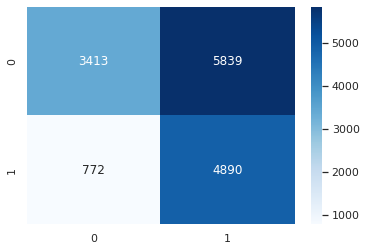

In [39]:

# import seaborn as sns
# sns.heatmap(confusion_matrix(Y_val, y_pred, labels=[0, 1]), annot=True)

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(Y_val, y_pred, labels=[0, 1]), annot=True, fmt='', cmap='Blues')

In [56]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume model is your trained CatBoost model
y_pred_prob = model.predict_proba(X_val)[:, 1]

# Create a DataFrame from the predicted probabilities and true labels
df = pd.DataFrame({'y_true': Y_val, 'y_pred_prob': y_pred_prob})

# Calculate the deciles
df['decile'] = pd.qcut(df['y_pred_prob'].rank(method='dense'), 10, labels=False)


In [57]:


# Initialize an empty list to store the metrics for each decile
metrics = []

for i in range(10):
    decile = df[df['decile'] == i]
    accuracy = accuracy_score(decile['y_true'], decile['y_pred_prob'] > 0.5)
    precision = precision_score(decile['y_true'], decile['y_pred_prob'] > 0.5)
    recall = recall_score(decile['y_true'], decile['y_pred_prob'] > 0.5)
    f1 = f1_score(decile['y_true'], decile['y_pred_prob'] > 0.5)
    mean_prob = decile.y_pred_prob.mean()
    count = decile.shape[0]
    true = decile.y_true.sum()
    percentage = ((decile.y_true.sum()/count)*100).round(2)
    
    # Append the metrics for this decile to the list
    metrics.append([i,count, accuracy, precision, recall, f1, mean_prob, true,percentage])

# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Decile','Count', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean Probability', 'Pass Cases','Decile percentage'])

print(metrics_df)


   Decile  Count  Accuracy  Precision    Recall  F1 Score  Mean Probability  \
0       0   1492  0.959115   0.000000  0.000000  0.000000          0.108676   
1       1   1491  0.801476   0.315068  0.085502  0.134503          0.381088   
2       2   1491  0.350771   0.350771  1.000000  0.519364          0.563601   
3       3   1492  0.391421   0.391421  1.000000  0.562620          0.623301   
4       4   1491  0.401073   0.401073  1.000000  0.572523          0.658632   
5       5   1491  0.418511   0.418511  1.000000  0.590071          0.685828   
6       6   1492  0.443700   0.443700  1.000000  0.614670          0.710228   
7       7   1491  0.487592   0.487592  1.000000  0.655546          0.736422   
8       8   1491  0.503689   0.503689  1.000000  0.669938          0.768316   
9       9   1492  0.619303   0.619303  1.000000  0.764901          0.825330   

   Pass Cases  Decile percentage  
0          61               4.09  
1         269              18.04  
2         523            

In [58]:
metrics_df

,Decile,Count,Accuracy,Precision,Recall,F1 Score,Mean Probability,Pass Cases,Decile percentage
0,0,1492,0.959115,0.000000,0.000000,0.000000,0.108676,61,4.09
1,1,1491,0.801476,0.315068,0.085502,0.134503,0.381088,269,18.04
2,2,1491,0.350771,0.350771,1.000000,0.519364,0.563601,523,35.08
3,3,1492,0.391421,0.391421,1.000000,0.562620,0.623301,584,39.14
4,4,1491,0.401073,0.401073,1.000000,0.572523,0.658632,598,40.11
5,5,1491,0.418511,0.418511,1.000000,0.590071,0.685828,624,41.85
6,6,1492,0.443700,0.443700,1.000000,0.614670,0.710228,662,44.37
7,7,1491,0.487592,0.487592,1.000000,0.655546,0.736422,727,48.76
8,8,1491,0.503689,0.503689,1.000000,0.669938,0.768316,751,50.37
9,9,1492,0.619303,0.619303,1.000000,0.764901,0.825330,924,61.93


In [59]:
metrics_df['Pass Cases'].sum()

5723

In [61]:
286/6


47.666666666666664

In [56]:
metrics_df.percentage.sum()

99.98

In [324]:
X_val

,no_of_trades,total_bl,live_bl,total_cc,total_cl,total_hl,total_al,new_pl_3m,new_bl_3m,new_cc_3m,sum_pl_limit,sum_pl_limit_last_6m,sum_bl_limit,sum_bl_limit_last_6m,sum_cc_limit,TotalOverDueAmount,1_months_dpd_instances,score,Age,Income,derog,pl_vintage,bl_vintage,cl_vintage,max_pl_remaining_balance_per,max_bl_remaining_balance_per,max_credit_utilization,RBL_ultrahni,dbr,2_months_max_dpd,cl_last_closed,mean_pl_remaining_balance_per,mean_al_remaining_balance_per,mean_hl_remaining_balance_per,guarantor,PL_Enq_Amount_1M_sum,PL_Enq_Amount_2M_sum,PL_Enq_Amount_3M_sum,PL_Enq_Amount_6M_sum,Hl_Enq_Amount_1M_sum,Hl_Enq_Amount_2M_sum,Hl_Enq_Amount_3M_sum,Hl_Enq_Amount_6M_sum,BL_Enq_1M,BL_Enq_2M,BL_Enq_3M,BL_Enq_6M,count
111369,11,0,0,0,2,0,0,0,0,0,32560.0,0.0,0.0,0.0,0.0,28442.0,1,637.0,28.0,1000.000000,1,43.0,0.0,51.0,1.190600,0.0,NaN,0,22.516885,900,282.0,0.354630,0.000000,0.0,0,5000.0,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
85837,6,0,0,2,0,0,0,0,0,0,630000.0,280000.0,0.0,0.0,66681.0,34022.0,0,675.0,40.0,38000.000000,1,23.0,0.0,0.0,0.898029,0.0,NaN,0,50.000000,319,NaN,0.194839,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0
85045,12,0,0,3,0,0,7,0,0,0,0.0,0.0,0.0,0.0,119104.0,319339.0,1,599.0,46.0,500000.000000,1,0.0,0.0,0.0,0.000000,0.0,NaN,0,50.000000,900,NaN,0.000000,0.078020,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
37157,13,0,0,1,2,0,1,0,0,0,1760534.0,0.0,0.0,0.0,201.0,324396.0,0,636.0,57.0,42798.416667,1,217.0,0.0,24.0,0.781049,0.0,NaN,0,50.000000,425,NaN,0.137322,0.063029,0.0,0,6510002.0,6510002.0,6510002.0,6510002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
93512,11,0,0,0,2,0,0,0,0,0,770000.0,0.0,0.0,0.0,0.0,469768.0,1,624.0,43.0,3000.000000,1,100.0,0.0,101.0,1.459244,0.0,NaN,0,37.646896,900,2370.0,0.416497,0.000000,0.0,0,620000.0,620000.0,620000.0,620000.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128001,13,0,0,4,0,0,0,0,0,0,150000.0,0.0,0.0,0.0,240910.0,322384.0,0,630.0,39.0,NaN,1,65.0,0.0,0.0,0.730600,0.0,NaN,0,12.228534,900,NaN,0.056200,0.000000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168740,9,0,0,4,0,0,0,0,0,0,1250000.0,0.0,0.0,0.0,232382.0,1247454.0,1,616.0,38.0,111111.111111,1,90.0,0.0,0.0,1.496090,0.0,1.0,0,49.286527,900,NaN,0.307006,0.000000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101304,22,0,0,6,4,0,2,0,0,0,250725.0,0.0,0.0,0.0,373629.0,67861.0,0,687.0,34.0,0.000000,1,70.0,0.0,74.0,0.000000,0.0,NaN,0,5.257183,900,1802.0,0.000000,0.000000,0.0,0,143001.0,143001.0,143001.0,143001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
128002,13,0,0,1,6,0,0,0,0,0,376000.0,0.0,0.0,0.0,146612.0,525712.0,2,595.0,44.0,31250.000000,1,218.0,0.0,66.0,0.815635,0.0,NaN,0,50.000000,900,1733.0,0.114426,0.000000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
df

,y_true,y_pred_prob,decile
111369,0,0.155319,3
85837,0,0.721847,9
85045,0,0.133180,2
37157,0,0.443222,8
93512,0,0.109067,1
...,...,...,...
128001,0,0.230578,5
168740,0,0.092335,0
101304,0,0.448652,8
128002,0,0.069946,0


In [137]:
# Assuming `model` is your trained CatBoost model
feature_importances = model.get_feature_importance()
feature_names = model.feature_names_
check = []
# Print feature names and their corresponding importances
for name, importance in zip(feature_names, feature_importances):
    rounded_importance = round(importance, 3)
    check.append([name,rounded_importance])
    
feature_df = pd.DataFrame(check, columns = ['feature', 'importance'])

In [138]:
pd.set_option('display.max_rows', 30)


In [139]:
feature_df = feature_df.sort_values(by = ['importance'], ascending = False)
feature_df.head(30)

,feature,importance
0,score,12.405
2,2_months_max_dpd,7.703
1,Age,6.140
3,max_dpd_ever,5.022
16,pl_weighted_dpd_6m,3.445
5,Vintage,3.085
7,pl_vintage,2.966
9,dbr,2.727
4,Income,2.567
11,derog,2.546


In [434]:
feature_df[feature_df['importance'] == 0]

,feature,importance


In [208]:
5000/3600


1.3888888888888888

In [67]:
threshold = 0.7
cols_imp = list(feature_df.feature)
important_df = feature_df
highly_correlated_columns = X[cols_imp].corr().abs()[X[cols_imp].corr().abs()>threshold]
highly_correlated_columns = highly_correlated_columns[(highly_correlated_columns<1) & (~highly_correlated_columns.isna())]
correlated_list=[]
for index, row in highly_correlated_columns.iterrows():
    for column in highly_correlated_columns.columns:
        if pd.notnull(row[column]):
            correlated_list.append([index,column])
remove_elements = []
for i,j in correlated_list:
    if important_df.index[important_df['feature']==i].tolist()[0] < important_df.index[important_df['feature']==j].tolist()[0]:
        remove_elements.append(j)
    else:
        remove_elements.append(i)
remove_elements = list(set(remove_elements))
list(important_df[~important_df['feature'].isin(remove_elements)]['feature'])







['score',
 'Age',
 '2_months_max_dpd',
 'max_dpd_ever',
 'Income',
 'Vintage',
 'live_pl_vintage',
 'pl_vintage',
 'cl_vintage',
 'dbr',
 'pl_last_active',
 'derog',
 'no_of_trades',
 'live_trad',
 'pl_last_closed',
 'total_pl',
 'pl_weighted_dpd_6m',
 'max_pl_remaining_balance_per',
 'al_last_closed',
 'cc_vintage',
 'cl_last_closed',
 '1_months_max_dpd',
 'mean_pl_remaining_balance_per',
 'live_cl_vintage',
 'cc_weighted_dpd_6m',
 'sum_cc_limit',
 'cc_last_active',
 'max_EMI',
 'mean_al_remaining_balance_per',
 'al_vintage',
 'bl_vintage',
 'sum_pl_limit',
 'live_cl',
 'total_cl',
 'sum_pl_limit_last_6m',
 'mean_bl_remaining_balance_per',
 'live_al_vintage',
 'live_pl',
 'total_cc',
 'sum_bl_limit',
 'sum_cc_limit_last_6m',
 'cc_last_closed',
 'live_bl_vintage',
 'cl_weighted_dpd_6m',
 'joint',
 'max_credit_utilization',
 'new_pl_3m',
 'new_cc_6m',
 'guarantor',
 'total_al',
 'sum_bl_limit_last_6m',
 'hl_last_closed',
 'new_cc_3m',
 'mean_hl_remaining_balance_per',
 'bl_weighted_dpd_

In [39]:
pd.set_option('display.max_rows', 50)

input1.corr()

,no_of_trades,live_trad,total_pl,live_pl,total_bl,live_bl,total_cc,live_cc,total_cl,live_cl,total_hl,live_hl,total_al,live_al,new_pl_3m,new_pl_6m,new_bl_3m,new_bl_6m,new_cc_3m,new_cc_6m,sum_pl_limit,active_sum_pl_limit,sum_pl_limit_last_6m,sum_bl_limit,active_sum_bl_limit,sum_bl_limit_last_6m,sum_cc_limit,active_sum_cc_limit,sum_cc_limit_last_6m,pl_remaining_balance,bl_remaining_balance,al_remaining_balance,hl_remaining_balance,No_of_ALHLLAPPLCCBLSBL,TotalOverDueAmount,1_months_dpd_instances,2_months_dpd_instances,3_months_dpd_instances,6_months_dpd_instances,9_months_dpd_instances,12_months_dpd_instances,score,Age,Income,max_EMI,derog,Vintage,pl_vintage,live_pl_vintage,pl_last_active,pl_last_closed,bl_vintage,live_bl_vintage,cc_vintage,live_cc_vintage,cl_vintage,live_cl_vintage,hl_vintage,live_hl_vintage,al_vintage,live_al_vintage,active_max_pl_limit,max_pl_limit,max_pl_limit_last_6m,active_max_bl_limit,max_bl_limit,max_bl_limit_last_6m,active_max_cc_limit,max_cc_limit,max_cc_limit_last_6m,max_pl_remaining_balance_per,max_bl_remaining_balance_per,max_al_remaining_balance_per,max_hl_remaining_balance_per,max_credit_utilization,RBL_ultrahni,final_income,dbr,1_months_max_dpd,2_months_max_dpd,3_months_max_dpd,6_months_max_dpd,9_months_max_dpd,12_months_max_dpd,weighted_dpd_6m,weighted_dpd_12m,pl_weighted_dpd_6m,pl_weighted_dpd_12m,bl_weighted_dpd_6m,bl_weighted_dpd_12m,cl_weighted_dpd_6m,cl_weighted_dpd_12m,cc_weighted_dpd_6m,cc_weighted_dpd_12m,max_dpd_ever,30_plus_ever_count,cc_last_active,cc_last_closed,cl_last_active,cl_last_closed,hl_last_active,hl_last_closed,al_last_active,al_last_closed,mean_pl_remaining_balance_per,mean_bl_remaining_balance_per,mean_al_remaining_balance_per,mean_hl_remaining_balance_per,mean_credit_utilization,guarantor,joint,count_of_active_stpl,Target
no_of_trades,1.000000,0.542137,0.691680,0.481619,0.226413,0.118661,0.405229,0.362231,0.467663,0.203615,0.181364,0.143129,0.201043,0.128278,0.273554,0.424923,0.033047,0.057799,0.112836,0.167847,0.293415,0.291690,0.181718,0.110573,0.074462,0.044442,0.119888,0.103383,0.172268,0.256516,0.073875,0.096986,0.146420,0.773087,0.013535,0.094935,0.151229,0.160608,0.161791,0.167787,0.180955,0.082262,0.086689,0.160875,0.429161,0.123082,0.389718,0.394824,0.296567,-0.034573,-0.039503,0.185463,0.089216,0.347551,0.324152,0.361336,0.140063,0.174727,0.124823,0.226001,0.096768,0.249113,0.175744,0.141994,0.066540,0.081717,0.041104,0.049296,0.046968,0.168256,0.117796,0.079812,0.113059,0.143508,0.149743,0.086000,0.067952,0.043629,0.030999,0.044914,0.044619,0.049096,0.072380,0.090500,0.041484,0.047216,0.037896,0.042579,0.011530,0.012634,0.008567,0.009710,0.037315,0.037678,0.164192,0.172826,0.031128,0.043441,0.058139,0.019756,0.052135,0.094391,0.009108,0.074927,-0.006570,-0.000614,-0.006503,-0.021243,0.088351,0.139346,0.226405,0.366901,-0.028154
live_trad,0.542137,1.000000,0.296358,0.619900,0.210883,0.233763,0.614761,0.652155,0.447370,0.396976,0.192929,0.187429,0.189257,0.187272,0.256598,0.268212,0.066281,0.119509,0.253563,0.362234,0.317196,0.412546,0.248334,0.152650,0.136987,0.059512,0.172824,0.173943,0.339027,0.360596,0.134044,0.148233,0.171071,0.453812,0.002463,0.144987,0.138754,0.125022,0.093163,0.075724,0.062155,0.219494,-0.022576,0.258978,0.492426,-0.201661,0.295737,0.322888,0.336866,-0.127335,-0.074855,0.156491,0.123166,0.383159,0.428010,0.295383,0.193917,0.161011,0.144599,0.186840,0.114833,0.339426,0.217408,0.215654,0.105334,0.107126,0.054841,0.070509,0.052693,0.330647,0.147820,0.157765,0.166158,0.187511,0.216610,0.100303,0.061754,0.215374,-0.007922,-0.042210,-0.049492,-0.057417,-0.060249,-0.063809,-0.052008,-0.064072,-0.032241,-0.040474,0.004505,0.004062,-0.026380,-0.030207,-0.018815,-0.023631,-0.029387,-0.007374,-0.127161,-0.052847,0.001732,-0.048091,0.015874,0.093073,-0.062348,0.043316,0.003550,-0.004940,-0.019373,0.008551,0.052060,0.165964,0.307164,0.562475,0.034575
total_pl,0.691680,0.296358,1.000000,0.522951,0.003607,-0.004981,0.165180,0.149941,0.151523,0.066473,0.0